In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
Location = "datasets/diamonds.csv"
df = pd.read_csv(Location)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
from sklearn.linear_model import LinearRegression
X = df.drop('price', axis = 1)

#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [16]:
df.shape

(53940, 11)

In [17]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
df.drop('clarity', axis=1)

,Unnamed: 0,carat,cut,color,depth,table,price,x,y,z
0,1,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,59.4,61.0,338,4.00,4.05,2.39


In [19]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
df2=df.drop('clarity', axis=1)

In [22]:
df2.head()

,Unnamed: 0,carat,cut,color,depth,table,price,x,y,z
0,1,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75


In [24]:
from sklearn.linear_model import LinearRegression
X = df2.drop('price', axis = 1)

#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
df3 = df2.drop('cut', axis=1)

In [33]:
df3.head()

,Unnamed: 0,carat,color,depth,table,price,x,y,z
0,1,0.23,E,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,E,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,E,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,I,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,J,63.3,58.0,335,4.34,4.35,2.75


In [34]:
df4 = df3.drop('color', axis=1)

In [38]:
df4.head()

,Unnamed: 0,carat,depth,table,price,x,y,z
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75


In [40]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [41]:
df5 = df.drop(['cut','color','carat'], axis=1)

In [44]:
df5.head()

,Unnamed: 0,clarity,depth,table,price,x,y,z
0,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,SI2,63.3,58.0,335,4.34,4.35,2.75


In [45]:
df5.dtypes

Unnamed: 0      int64
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [47]:
df.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [48]:
#make numeric value column based on string value column

#create a function that will return 1 if female and 0 if male
def score_to_numeric(x):
    if x=='Fair':
        return 1
    if x=='Good':
        return 2
    if x=='Very Good':
        return 3
    if x=='Premium':
        return 4
    if x=='Ideal':
        return 5
    
df['cut_val'] = df['cut'].apply(score_to_numeric)
df.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut_val
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,3
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,3
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,3


In [52]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [53]:
#make numeric value column based on string value column

#create a function that will return 1 if female and 0 if male
def score_to_numeric(x):
    if x=='D':
        return 1
    if x=='E':
        return 2
    if x=='F':
        return 3
    if x=='G':
        return 4
    if x=='H':
        return 5
    if x=='I':
        return 6
    if x=='J':
        return 7
    
df['color_val'] = df['color'].apply(score_to_numeric)
df.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut_val,color_val
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,2
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,2
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,2
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,6
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,7
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,7
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,3,6
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,3,5
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1,2
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,3,5


In [54]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

In [55]:
#make numeric value column based on string value column

#create a function that will return 1 if female and 0 if male
def score_to_numeric(x):
    if x=='SI1':
        return 1
    if x=='SI2':
        return 2
    if x=='VS1':
        return 3
    if x=='VS2':
        return 4
    if x=='VVS1':
        return 5
    if x=='VVS2':
        return 6
    if x=='I1':
        return 7
    if x=='IF':
        return 8
    
    
df['clarity_val'] = df['clarity'].apply(score_to_numeric)
df.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut_val,color_val,clarity_val
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,2,2
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,2,1
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,2,3
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,6,4
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,7,2
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,7,6
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,3,6,5
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,3,5,1
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1,2,4
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,3,5,3


In [56]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut_val,color_val,clarity_val
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,2,2
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,2,1
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,2,3
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,6,4
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,7,2


In [58]:
df6=df.drop(['cut','color','clarity'], axis=1)

In [59]:
df6.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_val,color_val,clarity_val
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,5,2,2
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,4,2,1
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,2,2,3
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,4,6,4
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,2,7,2


In [65]:
from sklearn.linear_model import LinearRegression
X = df6.drop('price', axis = 1)

#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
lm.fit(X, df6.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 10163.6937586


In [68]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Unnamed: 0,0.006506
1,carat,10708.930157
2,depth,-115.932916
3,table,-42.257712
4,x,-1100.190091
5,y,82.379949
6,z,39.468320
7,cut_val,164.260384
8,color_val,-277.479507
9,clarity_val,213.255929


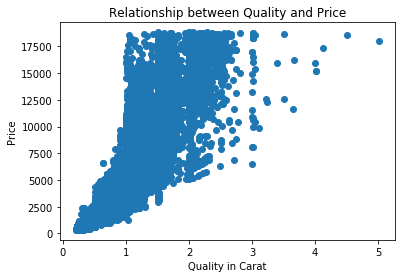

In [73]:
plt.scatter(df6.carat, df6.price) 
plt.xlabel("Quality in Carat") 
plt.ylabel("Price") 
plt.title("Relationship between Quality and Price") 
plt.show()

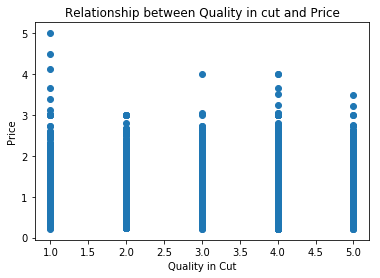

In [81]:
plt.scatter(df6.cut_val, df6.carat) 
plt.xlabel("Quality in Cut") 
plt.ylabel("Price") 
plt.title("Relationship between Quality in cut and Price") 
plt.show()

In [82]:
lm.predict(X)[0:5]

array([  -56.41019372,  -654.81690417,  -332.54912079,  -739.19305263,
       -1801.26452192])

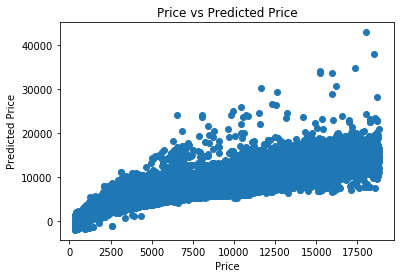

In [83]:
plt.scatter(df6.price, lm.predict(X))
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

In [84]:
#calculate mean squared error
mseFull = np.mean((df.price - lm.predict(X)) ** 2)
print(mseFull)

1880954.1650832228


In [86]:
df6.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_val,color_val,clarity_val
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,5,2,2
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,4,2,1
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,2,2,3
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,4,6,4
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,2,7,2


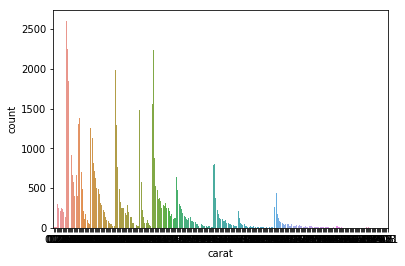

In [87]:
#bar chart of survival status count
sns.countplot(x='carat', data=df)

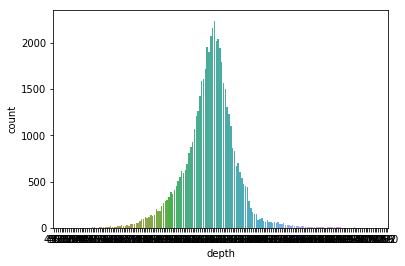

In [88]:
#bar chart of survival status count
sns.countplot(x='depth', data=df)

In [91]:
df7=df6.head(200)

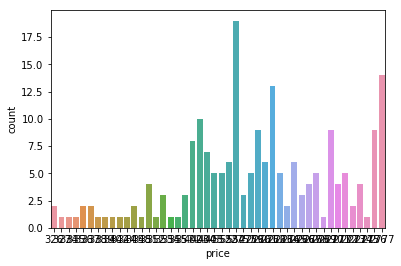

In [92]:
#bar chart of survival status count
sns.countplot(x='price', data=df7)

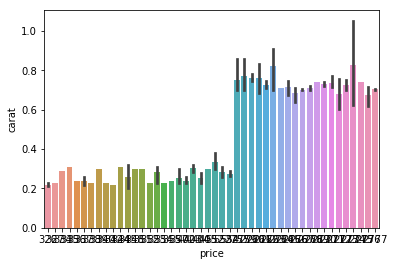

In [94]:
#survival status by sex
sns.barplot('price', 'carat', data=df7)

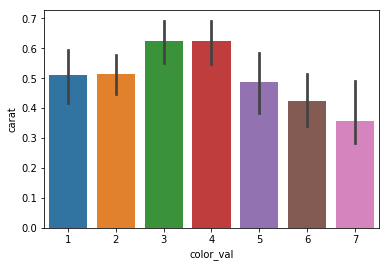

In [96]:
#survival status by sex
sns.barplot('color_val', 'carat', data=df7)

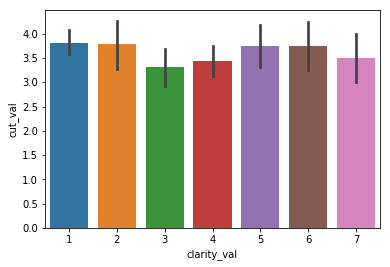

In [99]:
#survival status by sex
sns.barplot('clarity_val', 'cut_val', data=df7)

In [103]:
#find columns that have missing values
df.isnull().sum()

Unnamed: 0     0
carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price          0
x              0
y              0
z              0
cut_val        0
color_val      0
clarity_val    0
dtype: int64

In [105]:
#table of avg age of passenger by survival status, sex, and passenger class
df7.groupby(['color_val', 'cut_val', 'carat'])['price'].mean()

color_val  cut_val  carat
1          2        0.26      403.000000
           3        0.23      379.500000
                    0.24      553.000000
                    0.26      516.250000
                    0.61     2763.000000
                    0.70     2770.666667
                    0.71     2764.000000
                    0.73     2768.000000
                    0.75     2760.000000
           4        0.22      404.000000
                    0.30      552.000000
                    0.70     2773.000000
                    0.71     2769.000000
           5        0.30      552.000000
                    0.71     2764.333333
                    0.73     2770.000000
                    0.75     2773.000000
                    0.76     2770.000000
2          1        0.22      337.000000
                    0.86     2757.000000
           2        0.23      364.500000
                    0.26      554.000000
                    0.70     2759.000000
                    0.71     27

In [106]:
df.isnull().sum()

Unnamed: 0     0
carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price          0
x              0
y              0
z              0
cut_val        0
color_val      0
clarity_val    0
dtype: int64